run KNN algorithm,
First, load the images

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Function to load and convert image to pixel data
def image_to_pixels(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')  # Ensure the image is in RGB mode
    img_array = np.array(img)  # Convert image to NumPy array
    img_array_flattened = img_array.flatten()  # Flatten the array
    return img_array_flattened.tolist()  # Convert flattened array to a list


def listImgDir(directory, imagesLimit = False):
    imagesPath = []
    if(imagesLimit) :
        filenames = os.listdir(directory)[:imagesLimit]
    else :
        filenames = os.listdir(directory)
    for filename in filenames:
        if filename.endswith('.jpg'): # Adjust file extensions as needed
             imagesPath.append(os.path.join(directory, filename))    
    return imagesPath    

def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

#load images paths
beansImages = {}
labels_data = ['angular_leaf_spot', 'bean_rust', 'healthy']
for label in labels_data:
    directory = 'dataset beans/train/' + label
    beansImages[label] = listImgDir(directory)
    print (f"Total of {label} leaves: {len(beansImages[label])}")

Total of angular_leaf_spot leaves: 345
Total of bean_rust leaves: 348
Total of healthy leaves: 341


KNN algorithm need the scale (width and heigth) will be same, lets check the width and height

In [23]:
widths = []
heights = []

for label, beansImagesByLabel in beansImages.items():
    for beanImage in beansImagesByLabel:
        width, height = get_image_size(beanImage)
        widths.append(width)
        heights.append(height)
print(widths)
print(heights)

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,

as we can see all widths and heights are eqquals to 500, we dont need to resize images to scale the image

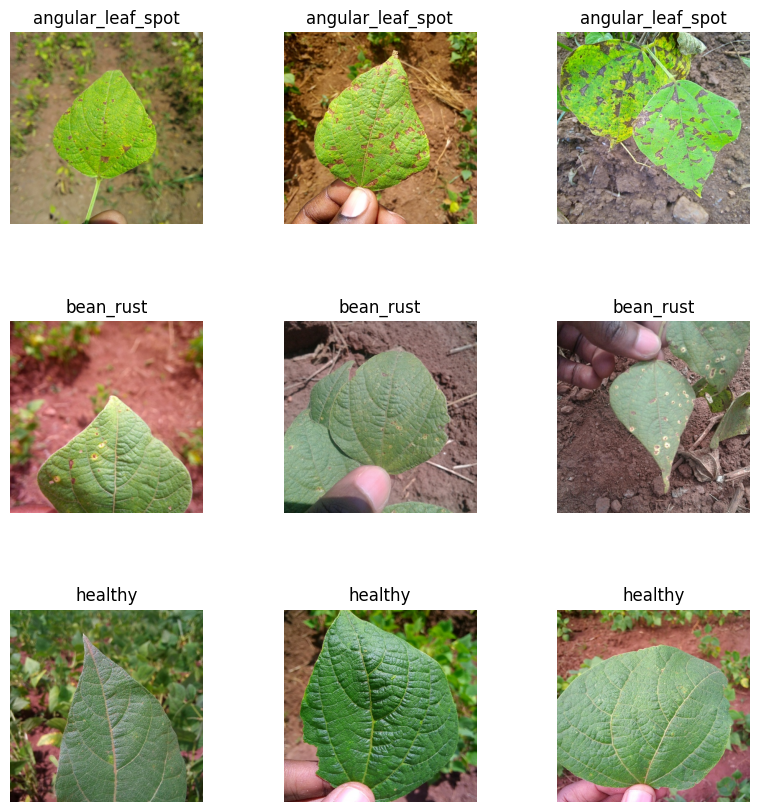

In [28]:
import random

def plot_sample_images():
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle('Title for All Subplots')

    for i, label in enumerate(beansImages.keys()):
        for j in range(3):
            random_image = random.randint(0, len(beansImages[label]) -1)	
            img_path = beansImages[label][random_image]
            img = plt.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(label)


    plt.show()


    # # A sample image
    # image1 = plt.imread(beansImages['images_path'][20])
    # image2 = plt.imread(beansImages['images_path'][31])
    # fig, ax = plt.subplot_mosaic([
    #     ['hopper', 'mri']
    # ], figsize=(7, 7))

    # ax['hopper'].imshow(image1)
    # ax['mri'].plot(image2)

    # im = ax['mri'].imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

    # markers = [(15.9, 14.5), (16.8, 15)]
    # x, y = zip(*markers)
    # ax['mri'].plot(x, y, 'o')

    # ax['mri'].set_title('MRI')

    plt.show()
plot_sample_images()

In [3]:



# Load beans dataset (replace with your image dataset)
beansDataset = loadBeansDataset()
X, y = beansDataset["images"], beansDataset["labels"]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5120772946859904
